In [1]:
push!(LOAD_PATH, "/home/cfpark/Projects/WST3D/DHC/main/")
import DHC_2DUtils
import Plots
import CUDA
import TimerOutputs
import Statistics
import Profile
import BenchmarkTools

┌ Info: Precompiling DHC_2DUtils [top-level]
└ @ Base loading.jl:1313


In [2]:
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8)
image=randn(256,256)
@BenchmarkTools.btime res_gpu=DHC_2DUtils.DHC_compute_gpu(image,hash_gpu,doS2=true,doS12=true, doS20=true);

  117.907 ms (336866 allocations: 35.74 MiB)


In [3]:
hash=DHC_2DUtils.fink_filter_hash(1,8)
image=randn(256,256)
@BenchmarkTools.btime res=DHC_2DUtils.DHC_compute(image,hash,doS2=true,doS12=true, doS20=true,FFTthreads=8);

  189.028 ms (651210 allocations: 310.79 MiB)


In [9]:
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8)
hash=DHC_2DUtils.fink_filter_hash(1,8);

In [10]:
image=randn(256,256)
res_gpu=DHC_2DUtils.DHC_compute_gpu(image,hash_gpu,doS2=true,doS12=true, doS20=true);
res=DHC_2DUtils.DHC_compute(image,hash,doS2=true,doS12=true, doS20=true,FFTthreads=8);

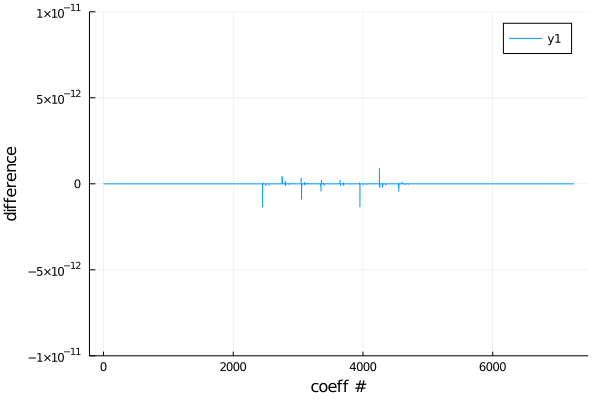

In [11]:
Plots.plot((res_gpu.-res))
Plots.plot!(ylim=(-1e-11,1e-11),ylabel="difference",xlabel="coeff #")

In [1]:
push!(LOAD_PATH, "/home/cfpark/Projects/WST3D/DHC/main/")
import DHC_2DUtils
import Plots
import CUDA
import TimerOutputs
import Statistics
import Profile
import BenchmarkTools

┌ Info: Precompiling DHC_2DUtils [top-level]
└ @ Base loading.jl:1313


In [2]:
N=128
im3d=randn(Float64,N,N,N);

In [3]:
hash=DHC_2DUtils.fink_filter_hash(1,8;nx=N)
hash3d=DHC_2DUtils.fink_filter_bank_3dizer(hash,1;nz=N)
res=DHC_2DUtils.DHC_compute_3d(im3d,hash3d);

In [4]:
res=DHC_2DUtils.DHC_compute_3d(im3d,hash3d);

In [4]:
@BenchmarkTools.btime res=DHC_2DUtils.DHC_compute_3d(im3d,hash3d);

  24.590 s (14279859 allocations: 35.62 GiB)


In [5]:
hash3d_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8;nx=N,threeD=true,nz=N)
res_gpu=DHC_2DUtils.DHC_compute_3d_gpu(im3d,hash3d_gpu);

In [6]:
res_gpu=DHC_2DUtils.DHC_compute_3d_gpu(im3d,hash3d_gpu);

In [6]:
@BenchmarkTools.btime res_gpu=DHC_2DUtils.DHC_compute_3d_gpu(im3d,hash3d_gpu);

  2.438 s (6642487 allocations: 224.80 MiB)


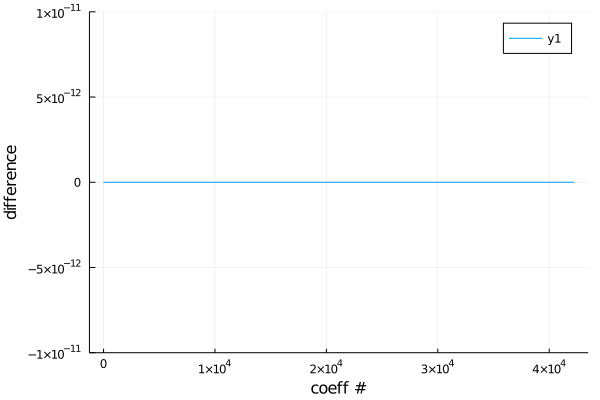

In [7]:
Plots.plot((res_gpu.-res))
Plots.plot!(ylim=(-1e-11,1e-11),ylabel="difference",xlabel="coeff #")

In [8]:
N=256
im3d=randn(Float64,N,N,N);

In [9]:
hash3d_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8;nx=N,threeD=true,nz=N)
res_gpu=DHC_2DUtils.DHC_compute_3d_gpu(im3d,hash3d_gpu);

In [10]:
@BenchmarkTools.btime res_gpu=DHC_2DUtils.DHC_compute_3d_gpu(im3d,hash3d_gpu);

  29.724 s (14227573 allocations: 662.38 MiB)


In [ ]:
import Pkg
Pkg.add("Healpix")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed CFITSIO_jll ─ v3.48.0+0
   Installed CFITSIO ───── v1.1.1
   Installed FITSIO ────── v0.16.7
   Installed Healpix ───── v2.3.0
    Updating `~/.julia/environments/v1.6/Project.toml`
  [9f4e344d] + Healpix v2.3.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [3b1b4be9] + CFITSIO v1.1.1
  [525bcba6] + FITSIO v0.16.7
  [9f4e344d] + Healpix v2.3.0
  [b3e40c51] + CFITSIO_jll v3.48.0+0
Precompiling project...
  ✓ CFITSIO_jll


In [160]:
import BenchmarkTools
import DHC_2DUtils
filt,info=DHC_2DUtils.fink_filter_bank(1,8);
inds,vals=DHC_2DUtils.fink_filter_list(filt);
mms,vals2=DHC_2DUtils.fink_filter_box(filt);
dat=randn(Float32,256,256)
res=zeros(Float32,256,256)
function mmtest1(dat,filt)
    res=dat.*filt
    return res
end

function mmtest2(dat,inds,vals,res)
    @inbounds @simd for ind in inds
        res[ind]=dat[ind]*vals[ind]
    end
    return res
end;

function mmtest3(dat,mm,vals2,res)
    res[mm[1,1]:mm[1,2],mm[2,1]:mm[2,2]].=dat[mm[1,1]:mm[1,2],mm[2,1]:mm[2,2]].*vals2
    return res
end;

In [161]:
test=12;

In [162]:
@BenchmarkTools.btime mmtest1(dat,filt[:,:,test]);

  101.034 μs (7 allocations: 1.00 MiB)


In [163]:
@BenchmarkTools.btime mmtest2(dat,inds[test],vals[test],res);

  213.096 ns (0 allocations: 0 bytes)


In [164]:
@BenchmarkTools.btime mmtest3(dat,mms[:,:,test],vals2[test],res);

  479.831 ns (5 allocations: 336 bytes)
